In [1]:
import pandas as pd
df = pd.read_csv("game_data.csv")

In [2]:
import numpy as np
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [3]:
cnt = 0
for i in df.Champ_ID.unique():
    for j in  df.vs.unique():
        mask = (df.Champ_ID == i) & (df.vs == j)
        df_sub= df[mask]
        cnt+=1
        print(df_sub)
        dff = df_sub
        break
    break
        
print(cnt)
        
    


       Position Champ_Name  Champ_ID  item0  item1  item2  item3  item4  \
0           TOP       Gwen       887   4633   3115   2421   3916   1055   
4632        TOP       Gwen       887   4633   2420   3089      0   3158   
11480       TOP       Gwen       887   4633   1054   4645      0      0   
11875       TOP       Gwen       887   4633   3089   4645      0   3135   
18705       TOP       Gwen       887   4633   3102      0   4645   3135   
20195       TOP       Gwen       887   1056   4630   1026   3102   4633   
27305       TOP       Gwen       887   2031   1054   3158   3802   1026   
39080       TOP       Gwen       887   4645   3111   1056      0   4633   
51380       TOP       Gwen       887   3135   4633   4645   3165   2055   
80185       TOP       Gwen       887   4645   4633   2421   1052   1054   
126835      TOP       Gwen       887   3158   2420   4645   3108   4633   
250980      TOP       Gwen       887   1056   4633   1052   1082      0   
255070      TOP       Gwe

In [4]:
dfff = dff[['item0','item1','item2','item3','item4','item5','item6']]
temp_arr = np.array([])
for i in dfff.columns:
    temp_arr = np.append(temp_arr,dfff[i])
temp_arr = temp_arr.tolist()

new_col = np.unique(temp_arr)
#print(np.unique(temp_arr))

In [5]:
dff["win"] = dff["win"].astype(int)
dff = dff.reset_index(drop=True)
dff

C:\Users\0712k\AppData\Local\Temp\ipykernel_10952\2709667689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["win"] = dff["win"].astype(int)


,Position,Champ_Name,Champ_ID,item0,item1,item2,item3,item4,item5,item6,win,vs
0,TOP,Gwen,887,4633,3115,2421,3916,1055,3111,3364,1,84
1,TOP,Gwen,887,4633,2420,3089,0,3158,3115,3363,1,84
2,TOP,Gwen,887,4633,1054,4645,0,0,3158,3364,1,84
3,TOP,Gwen,887,4633,3089,4645,0,3135,3158,3340,0,84
4,TOP,Gwen,887,4633,3102,0,4645,3135,3158,3364,1,84
5,TOP,Gwen,887,1056,4630,1026,3102,4633,3111,3364,1,84
6,TOP,Gwen,887,2031,1054,3158,3802,1026,1082,3340,0,84
7,TOP,Gwen,887,4645,3111,1056,0,4633,1058,3364,1,84
8,TOP,Gwen,887,3135,4633,4645,3165,2055,3158,3364,0,84
9,TOP,Gwen,887,4645,4633,2421,1052,1054,3111,3364,1,84


In [6]:
data_set = pd.DataFrame(columns = new_col)
for i in range(dff.shape[0]):
    for j in dfff.columns.tolist():        
        data_set.loc[i,dff.iloc[i][j]] = 1
data_set = data_set.fillna(0)
data_set['win']= dff['win']
data_set

,0.0,1001.0,1026.0,1052.0,1054.0,1055.0,1056.0,1058.0,1082.0,2031.0,...,3340.0,3363.0,3364.0,3802.0,3916.0,4630.0,4633.0,4635.0,4645.0,win
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
6,0,0,1,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
7,1,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
9,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1


In [31]:
match_data = data_set.drop([0],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(match_data.iloc[:,0:30],match_data.iloc[:,30] ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.06, gamma=0, subsample=0.5,
                           colsample_bytree=1, max_depth=8)

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

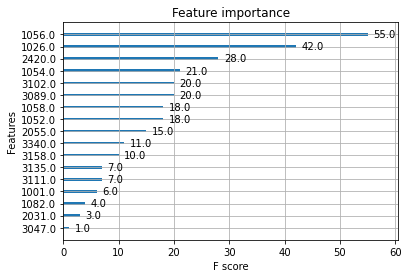

In [32]:
xgboost.plot_importance(xgb_model)